# Measurement Error

This module compares measurements on billionaires from Bloomberg and Forbes at almost the same moment in time (May and April 2021).
From this, one can make inference about measurement error.

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
# Library imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

# Tools
from thesis_tools.utils.data import *

## Data Preparation

In [3]:
df_forbes_2021 = read_billionaires_data(only_years=['2021'])
df_bloomberg_2021 = read_bloomberg_data()

In [4]:
df_merged = pd.merge(df_forbes_2021, df_bloomberg_2021, on='full_name', how='inner', suffixes=('_forbes', '_bloomberg'))
df_merged = df_merged[['full_name', 'net_worth_forbes', 'net_worth_bloomberg', 'log_net_worth_forbes', 'log_net_worth_bloomberg', 'country_of_citizenship', 'region_forbes', 'sub_region']]

In [5]:
df_merged['forbes_over_bloomberg'] = df_merged['net_worth_forbes'] / df_merged['net_worth_bloomberg']
df_merged['forbes_over_bloomberg_normalised'] = df_merged['forbes_over_bloomberg'] / df_merged['forbes_over_bloomberg'].mean()
df_merged['log_forbes_minus_log_bloomberg'] = df_merged['log_net_worth_forbes'] - df_merged['log_net_worth_bloomberg']
df_merged['log_forbes_minus_log_bloomberg_normalised'] = df_merged['log_forbes_minus_log_bloomberg'] - df_merged['log_forbes_minus_log_bloomberg'].mean()
df_merged['absolute_percentage_difference'] = np.abs(df_merged['forbes_over_bloomberg'] - 1) * 100
df_merged['absolute_log_difference'] = np.abs(df_merged['log_forbes_minus_log_bloomberg'])
df_merged['squared_log_difference'] = df_merged['log_forbes_minus_log_bloomberg'] ** 2

## Distribution

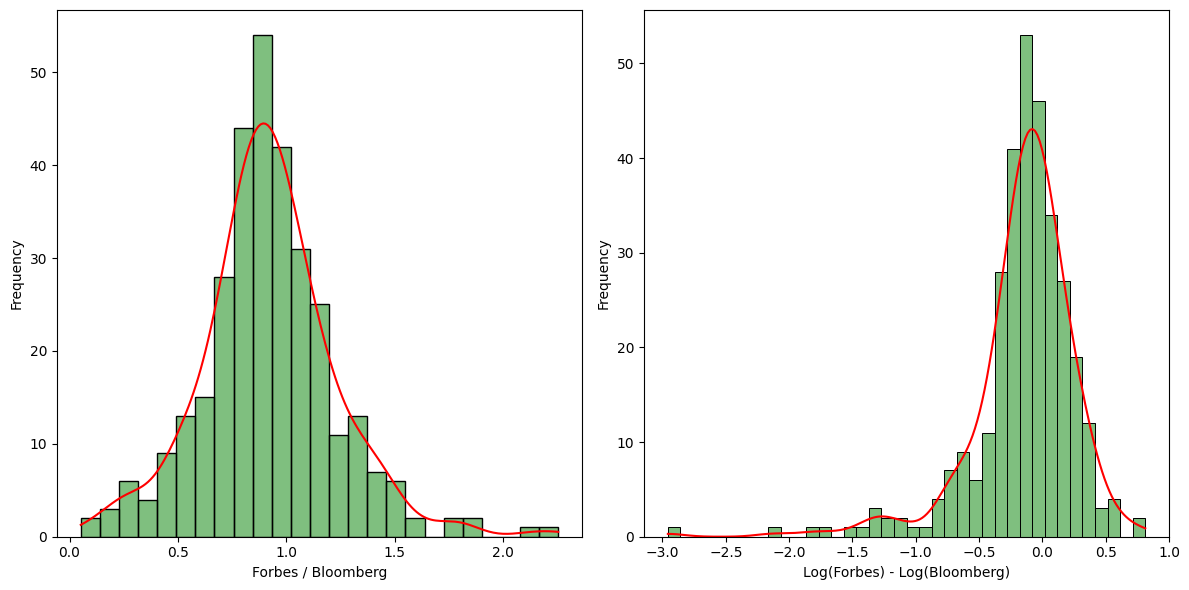

In [6]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
sns.histplot(df_merged['forbes_over_bloomberg'], kde=True, ax=ax[0], color='green')
ax[0].set_xlabel('Forbes / Bloomberg')
ax[0].set_ylabel('Frequency')
ax[0].lines[0].set_color('red')  # Setting the color of the kde line manually

sns.histplot(df_merged['log_forbes_minus_log_bloomberg'], kde=True, ax=ax[1], color='green')
ax[1].set_xlabel('Log(Forbes) - Log(Bloomberg)')
ax[1].set_ylabel('Frequency')
ax[1].lines[0].set_color('red')  # Setting the color of the kde line manually

plt.tight_layout()
plt.show()

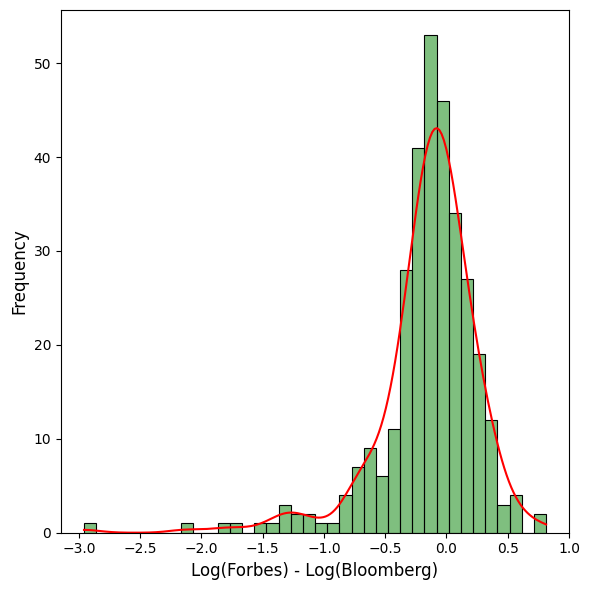

In [7]:
# Only the right plot
fig, ax = plt.subplots(1, 1, figsize=(6, 6))
sns.histplot(df_merged['log_forbes_minus_log_bloomberg'], kde=True, ax=ax, color='green')
ax.set_xlabel('Log(Forbes) - Log(Bloomberg)', fontsize=12)
ax.set_ylabel('Frequency', fontsize=12)
ax.lines[0].set_color('red')  # Setting the color of the kde line manually
plt.tight_layout()
plt.show()

In [8]:
# Test if the mean of the log difference is significantly different from 0
from scipy.stats import ttest_1samp
error_series = df_merged['log_forbes_minus_log_bloomberg']
t_stat, p_value = ttest_1samp(error_series, 0)
print(f'The mean of the log difference is: {error_series.mean()}')
print(f'The t-statistic is {t_stat} and the p-value is {p_value}')

The mean of the log difference is: -0.15268730224062654
The t-statistic is -6.540468902911239 and the p-value is 2.427557565030284e-10


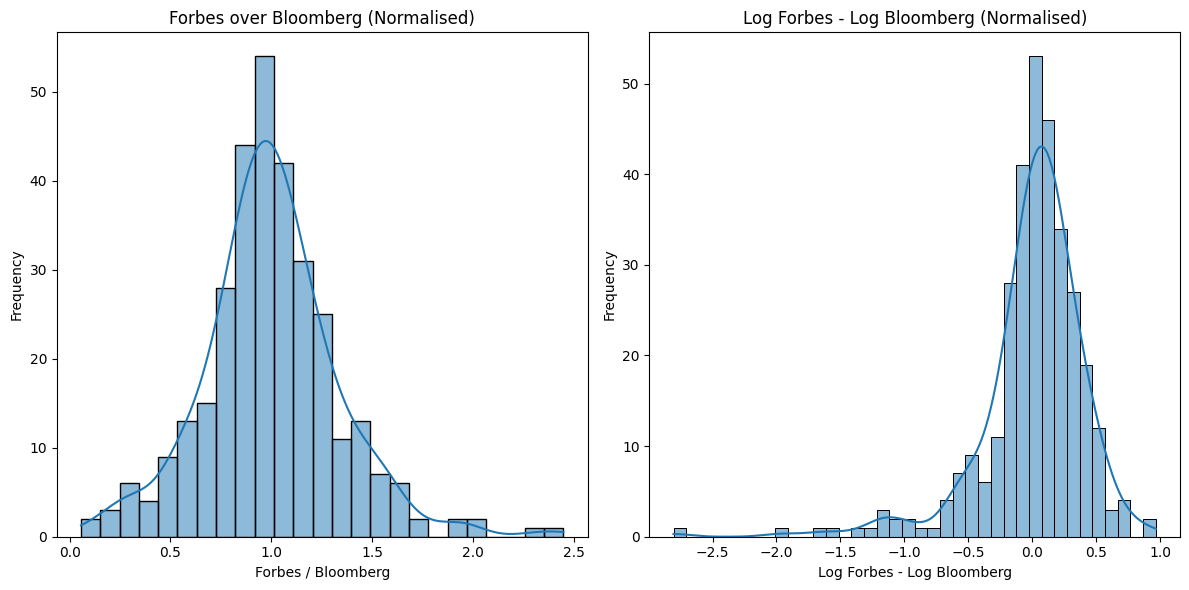

In [9]:
# Normalised forbes_over_bloomberg
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
sns.histplot(df_merged['forbes_over_bloomberg_normalised'], kde=True, ax=ax[0])
ax[0].set_title('Forbes over Bloomberg (Normalised)')
ax[0].set_xlabel('Forbes / Bloomberg')
ax[0].set_ylabel('Frequency')
sns.histplot(df_merged['log_forbes_minus_log_bloomberg_normalised'], kde=True, ax=ax[1])
ax[1].set_title('Log Forbes - Log Bloomberg (Normalised)')
ax[1].set_xlabel('Log Forbes - Log Bloomberg')
ax[1].set_ylabel('Frequency')
plt.tight_layout()
plt.show()


In [10]:
# Find out what the outliers are
df_merged.sort_values('forbes_over_bloomberg', ascending=False, inplace=True)
# take the top and bottom 10% of the data
trimming = 0.10
n = int(trimming * len(df_merged))
df_outliers = pd.concat([df_merged.head(n), df_merged.tail(n)])
df_trimmed = df_merged.iloc[n:-n]

In [11]:
df_outliers

,full_name,net_worth_forbes,net_worth_bloomberg,log_net_worth_forbes,log_net_worth_bloomberg,country_of_citizenship,region_forbes,sub_region,forbes_over_bloomberg,forbes_over_bloomberg_normalised,log_forbes_minus_log_bloomberg,log_forbes_minus_log_bloomberg_normalised,absolute_percentage_difference,absolute_log_difference,squared_log_difference
51,Zhang Yong,23.0,10.20,3.135494,2.322388,Singapore,East Asia,Southeast Asia,2.254902,2.449638,0.813106,0.965794,125.490196,0.813106,0.661142
22,Wang Wei,39.0,18.30,3.663562,2.906901,China,China,China,2.131148,2.315196,0.756661,0.909348,113.114754,0.756661,0.572535
99,Finn Rausing,13.9,7.66,2.631889,2.036012,Sweden,Europe,Scandinavia,1.814621,1.971334,0.595877,0.748564,81.462141,0.595877,0.355069
101,Kirsten Rausing,13.9,7.66,2.631889,2.036012,Sweden,Europe,Scandinavia,1.814621,1.971334,0.595877,0.748564,81.462141,0.595877,0.355069
57,Pierre Omidyar,21.4,12.10,3.063391,2.493205,United States,North America,U.S.,1.768595,1.921333,0.570185,0.722873,76.859504,0.570185,0.325111
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318,Vivien Chen,1.3,5.88,0.262364,1.771557,Hong Kong,China,China,0.221088,0.240182,-1.509192,-1.356505,77.891156,1.509192,2.277662
313,Thomas Kwok,2.2,12.10,0.788457,2.493205,Hong Kong,China,China,0.181818,0.197520,-1.704748,-1.552061,81.818182,1.704748,2.906166
320,Bom Kim,1.0,6.39,0.000000,1.854734,United States,North America,U.S.,0.156495,0.170010,-1.854734,-1.702047,84.350548,1.854734,3.440039
317,Raymond Kwok,1.5,12.60,0.405465,2.533697,Hong Kong,China,China,0.119048,0.129329,-2.128232,-1.975544,88.095238,2.128232,4.529370


A couple of explanations for some of the outliers:
* Overestimated by Forbes:
    * Zhang Yong: shares of Haidilao slid, but not by over 50%
    * Wang Wei: no clear explanation, shares just moved a bit
    * Finn & Kirsten Rausing: no clear explanation
    * Pierre Omidyar: no clear explanation, eBay shares did not move
* Underestimated by Forbes:
    * Henry Cheng: no explanation, maybe his daughter?
    * Raymond Kwok: no explanation
    * Bom Kim: no clear explanation
    * Thomas Kwok: see above
    * Vivien Chen: inherited, but not in 2021
    


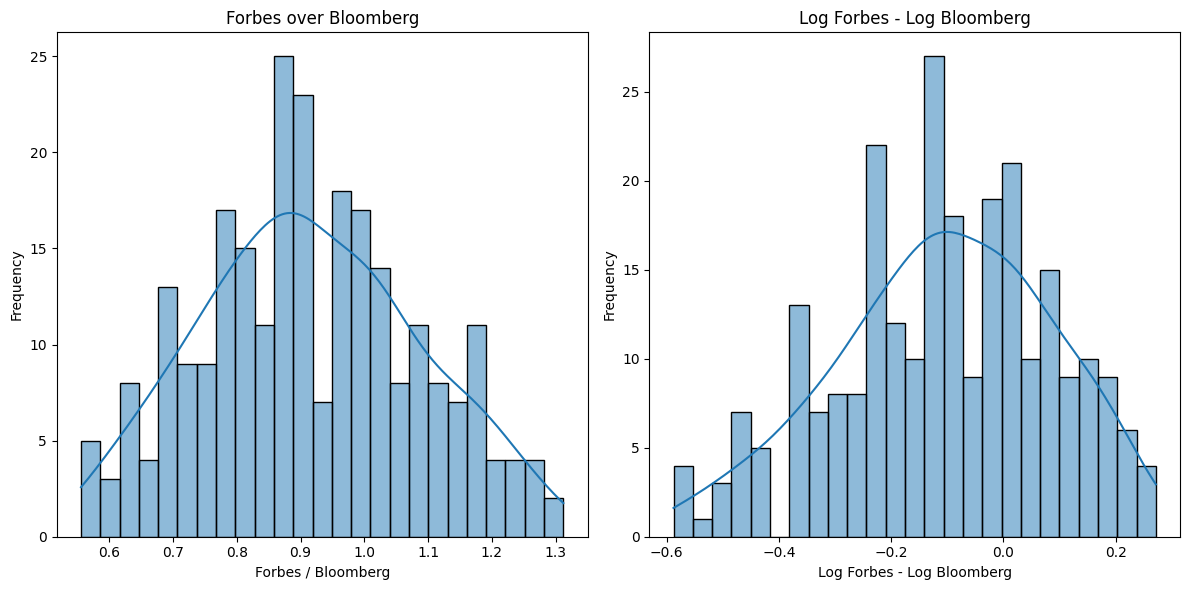

In [12]:
# Plot the trimmed data for both relative and log differences with kdes
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
n_bins = 25
sns.histplot(df_trimmed['forbes_over_bloomberg'], kde=True, ax=ax[0], bins=n_bins)
ax[0].set_title('Forbes over Bloomberg')
ax[0].set_xlabel('Forbes / Bloomberg')
ax[0].set_ylabel('Frequency')
sns.histplot(df_trimmed['log_forbes_minus_log_bloomberg'], kde=True, ax=ax[1], bins=n_bins)
ax[1].set_title('Log Forbes - Log Bloomberg')
ax[1].set_xlabel('Log Forbes - Log Bloomberg')
ax[1].set_ylabel('Frequency')
plt.tight_layout()
plt.show()


## Heteroskedasticity

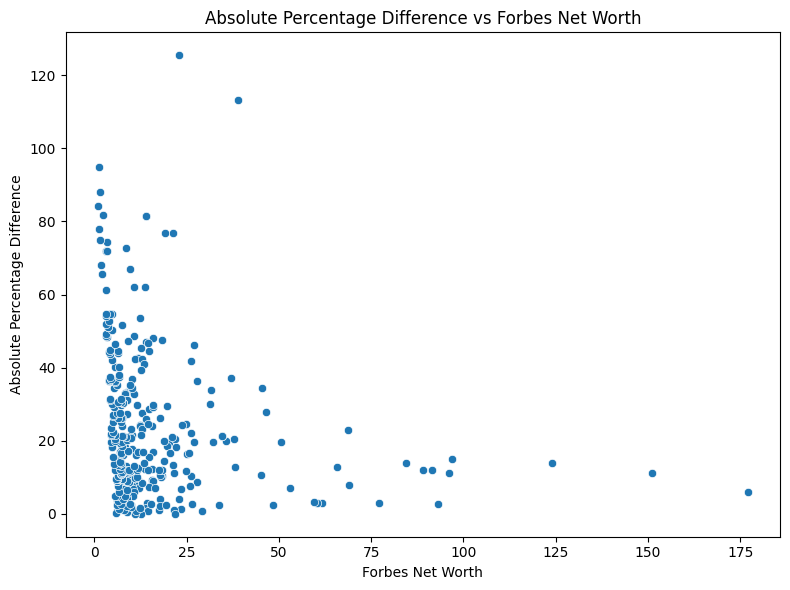

In [13]:
# Plot the absolute percentage difference against the forbes net worth
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
sns.scatterplot(x='net_worth_forbes', y='absolute_percentage_difference', data=df_merged, ax=ax)
ax.set_title('Absolute Percentage Difference vs Forbes Net Worth')
ax.set_xlabel('Forbes Net Worth')
ax.set_ylabel('Absolute Percentage Difference')
plt.tight_layout()
plt.show()

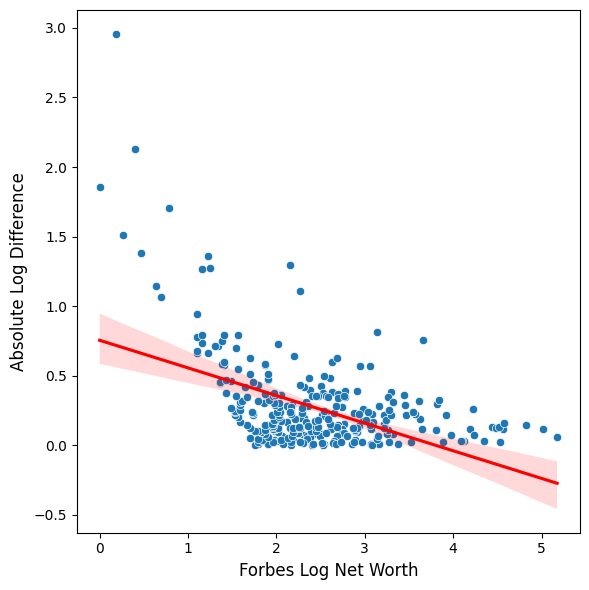

In [14]:
# Plot the absolute log difference against the forbes log net worth
fig, ax = plt.subplots(1, 1, figsize=(6, 6))
sns.scatterplot(x='log_net_worth_forbes', y='absolute_log_difference', data=df_merged, ax=ax)
sns.regplot(x='log_net_worth_forbes', y='absolute_log_difference', data=df_merged, ax=ax, scatter=False, color='red')
#ax.set_title('Absolute Log Difference vs Forbes Log Net Worth')
ax.set_xlabel('Forbes Log Net Worth', fontsize=12)
ax.set_ylabel('Absolute Log Difference', fontsize=12)
plt.tight_layout()
plt.show()

In [15]:
# Prepare the data for regression
X = df_merged[['log_net_worth_forbes']]
# X['log_net_worth_forbes_squared'] = X['log_net_worth_forbes'] ** 2
X = sm.add_constant(X)
y = df_merged['absolute_log_difference']

# Fit the regression model
model = sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     absolute_log_difference   R-squared:                       0.232
Model:                                 OLS   Adj. R-squared:                  0.229
Method:                      Least Squares   F-statistic:                     96.17
Date:                     Sun, 30 Jun 2024   Prob (F-statistic):           5.14e-20
Time:                             10:37:54   Log-Likelihood:                -67.566
No. Observations:                      321   AIC:                             139.1
Df Residuals:                          319   BIC:                             146.7
Df Model:                                1                                         
Covariance Type:                 nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.7548      0.051     14.895      0.000       0.655       0.855
log_net_worth_forbes    -0.1985      0.020     -9.806      0.000      -0.238      -0.159
==============================================================================
Omnibus:                      204.351   Durbin-Watson:                   0.437
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2177.569
Skew:                           2.491   Prob(JB):                         0.00
Kurtosis:                      14.747   Cond. No.                         8.68
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

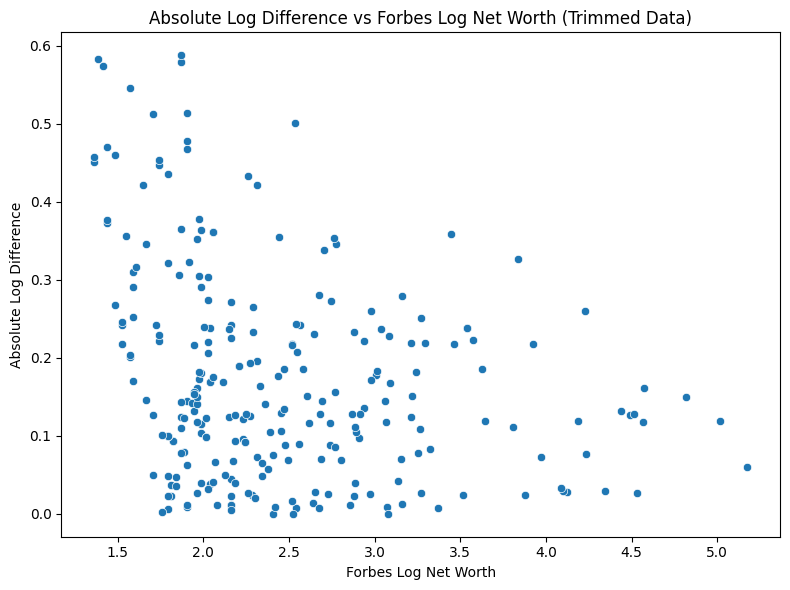

In [16]:
# Now plot the absolute log difference against the forbes net worth for the trimmed data
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
sns.scatterplot(x='log_net_worth_forbes', y='absolute_log_difference', data=df_trimmed, ax=ax)
ax.set_title('Absolute Log Difference vs Forbes Log Net Worth (Trimmed Data)')
ax.set_xlabel('Forbes Log Net Worth')
ax.set_ylabel('Absolute Log Difference')
plt.tight_layout()
plt.show()

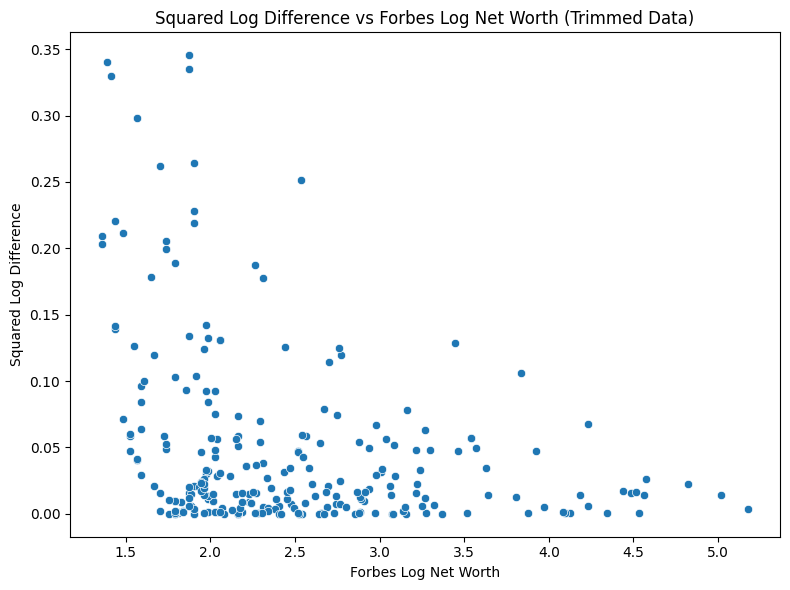

In [17]:
# Now plot the absolute log difference against the forbes net worth for the trimmed data
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
sns.scatterplot(x='log_net_worth_forbes', y='squared_log_difference', data=df_trimmed, ax=ax)
ax.set_title('Squared Log Difference vs Forbes Log Net Worth (Trimmed Data)')
ax.set_xlabel('Forbes Log Net Worth')
ax.set_ylabel('Squared Log Difference')
plt.tight_layout()
plt.show()

## Investigating how this relates to test significance

In [18]:
from thesis_tools.statistical_tests.tests import *

In [19]:
# Read the forbes data for all years
df = read_billionaires_data()
# group by sub_region and year
grouped = df.groupby(['sub_region', 'year'])

In [20]:
# show the U.S. in 2021
us_21 = grouped.get_group(('U.S.', '2021'))

Test Statistic: 0.781744212922679
P-value (lower-sided): 0.9852
P-value (upper-sided): 0.0148
P-value (two-sided): 0.0296


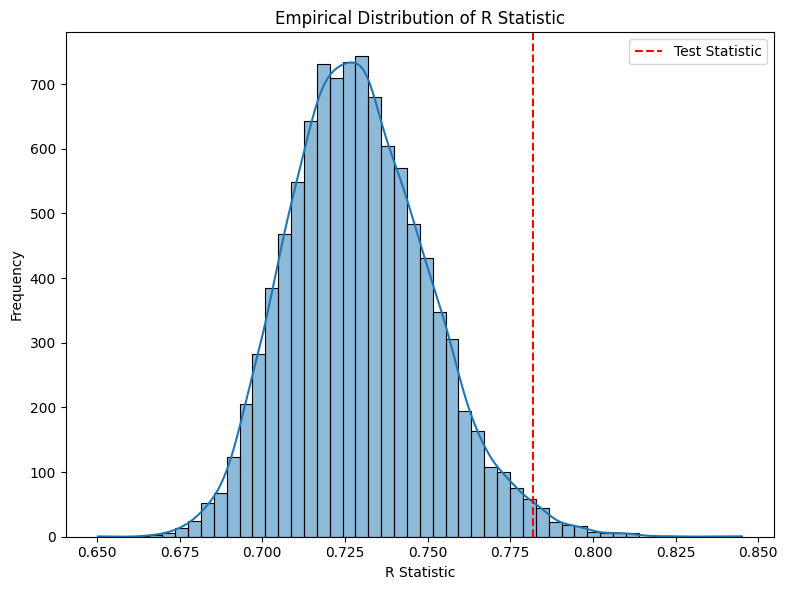

In [21]:
test_stat, p_val_lo, p_val_hi, p_val_2_sided, dist = R_stat_pareto_test(
    us_21['log_net_worth'],
    order=2,
    n_samples_empirical_distribution=10000,
    round_decimals_non_log=1,
    measurement_error='empirical_relative'
)
print('Test Statistic:', test_stat)
print('P-value (lower-sided):', p_val_lo)
print('P-value (upper-sided):', p_val_hi)
print('P-value (two-sided):', p_val_2_sided)

# Plot the empirical distribution
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
sns.histplot(dist, kde=True, ax=ax, bins=50)
ax.axvline(test_stat, color='red', linestyle='--', label='Test Statistic')
ax.legend()
ax.set_title('Empirical Distribution of R Statistic')
ax.set_xlabel('R Statistic')
ax.set_ylabel('Frequency')
plt.tight_layout()
plt.show()

Test Statistic: 0.548368509798097
P-value (lower-sided): 0.7274
P-value (upper-sided): 0.2726
P-value (two-sided): 0.5452


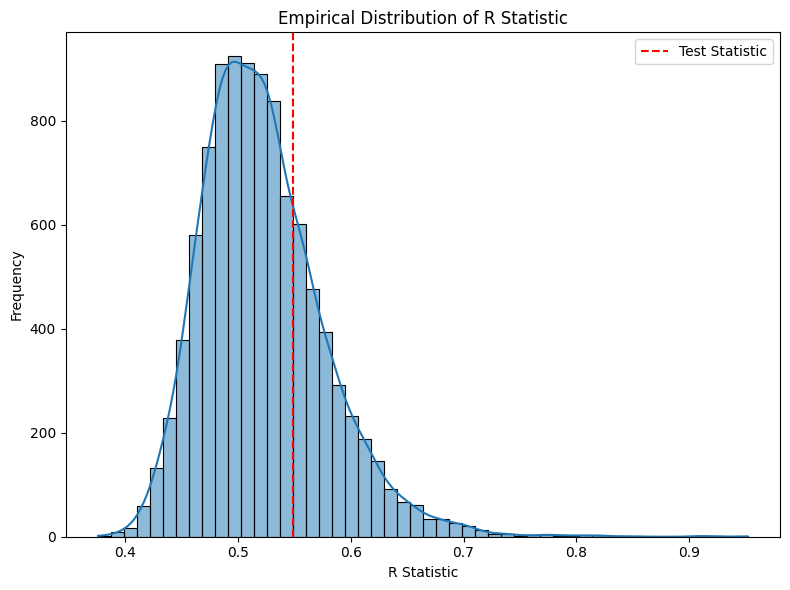

In [22]:
test_stat, p_val_lo, p_val_hi, p_val_2_sided, dist = R_stat_pareto_test(
    us_21['log_net_worth'],
    order=3,
    n_samples_empirical_distribution=10000,
    round_decimals_non_log=1,
    measurement_error='empirical_relative'
)
print('Test Statistic:', test_stat)
print('P-value (lower-sided):', p_val_lo)
print('P-value (upper-sided):', p_val_hi)
print('P-value (two-sided):', p_val_2_sided)

# Plot the empirical distribution
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
sns.histplot(dist, kde=True, ax=ax, bins=50)
ax.axvline(test_stat, color='red', linestyle='--', label='Test Statistic')
ax.legend()
ax.set_title('Empirical Distribution of R Statistic')
ax.set_xlabel('R Statistic')
ax.set_ylabel('Frequency')
plt.tight_layout()
plt.show()

Test Statistic: 0.781744212922679
P-value (lower-sided): 0.9963
P-value (upper-sided): 0.0037
P-value (two-sided): 0.0074


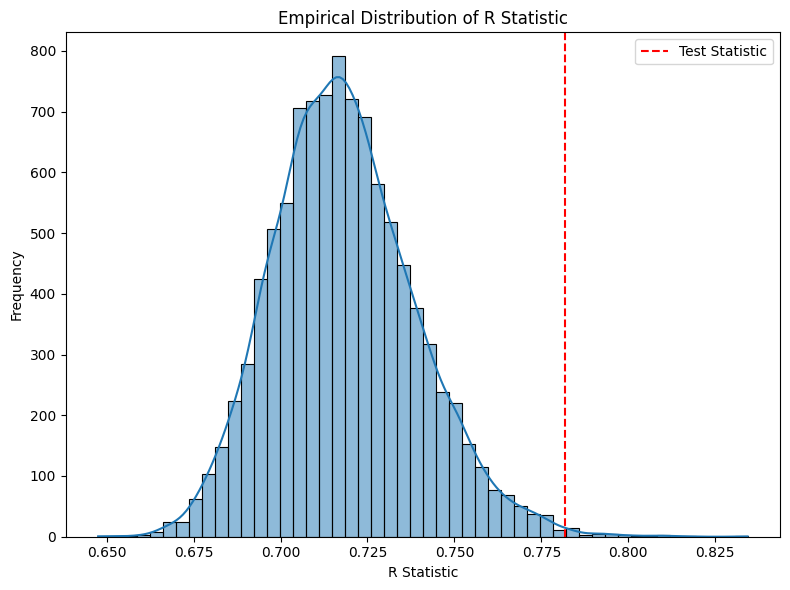

In [23]:
test_stat, p_val_lo, p_val_hi, p_val_2_sided, dist = R_stat_pareto_test(
    us_21['log_net_worth'],
    order=2,
    n_samples_empirical_distribution=10000,
    round_decimals_non_log=1,
    measurement_error='empirical_relative_normalised'
)
print('Test Statistic:', test_stat)
print('P-value (lower-sided):', p_val_lo)
print('P-value (upper-sided):', p_val_hi)
print('P-value (two-sided):', p_val_2_sided)

# Plot the empirical distribution
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
sns.histplot(dist, kde=True, ax=ax, bins=50)
ax.axvline(test_stat, color='red', linestyle='--', label='Test Statistic')
ax.legend()
ax.set_title('Empirical Distribution of R Statistic')
ax.set_xlabel('R Statistic')
ax.set_ylabel('Frequency')
plt.tight_layout()
plt.show()

Test Statistic: 0.548368509798097
P-value (lower-sided): 0.83
P-value (upper-sided): 0.17
P-value (two-sided): 0.34


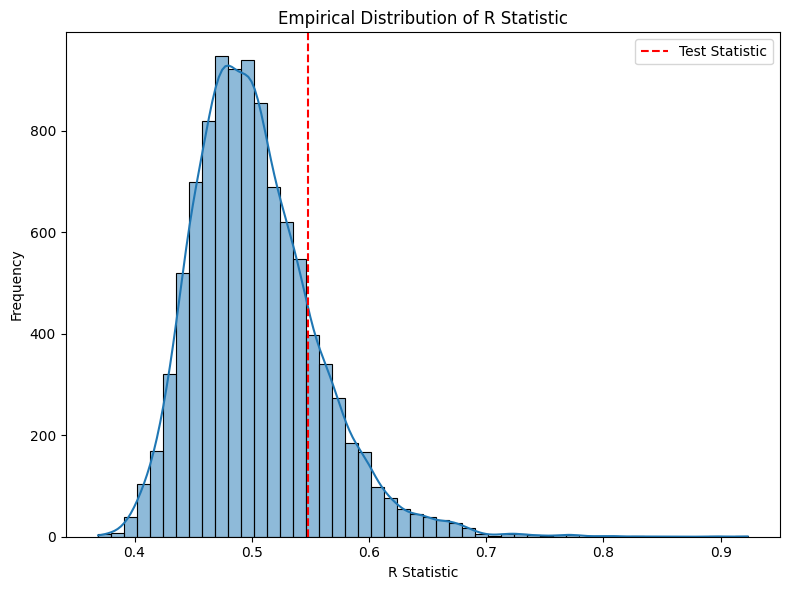

In [24]:
test_stat, p_val_lo, p_val_hi, p_val_2_sided, dist = R_stat_pareto_test(
    us_21['log_net_worth'],
    order=3,
    n_samples_empirical_distribution=10000,
    round_decimals_non_log=1,
    measurement_error='empirical_relative_normalised'
)
print('Test Statistic:', test_stat)
print('P-value (lower-sided):', p_val_lo)
print('P-value (upper-sided):', p_val_hi)
print('P-value (two-sided):', p_val_2_sided)

# Plot the empirical distribution
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
sns.histplot(dist, kde=True, ax=ax, bins=50)
ax.axvline(test_stat, color='red', linestyle='--', label='Test Statistic')
ax.legend()
ax.set_title('Empirical Distribution of R Statistic')
ax.set_xlabel('R Statistic')
ax.set_ylabel('Frequency')
plt.tight_layout()
plt.show()

### Demonstration of the effect of measurement errors

In [25]:
len(us_21)

724

Test Statistic: 0.781744212922679
P-value (lower-sided): 0.0
P-value (upper-sided): 1.0
P-value (two-sided): 0.0
Test Statistic: 0.781744212922679
P-value (lower-sided): 0.9903
P-value (upper-sided): 0.0097
P-value (two-sided): 0.0194


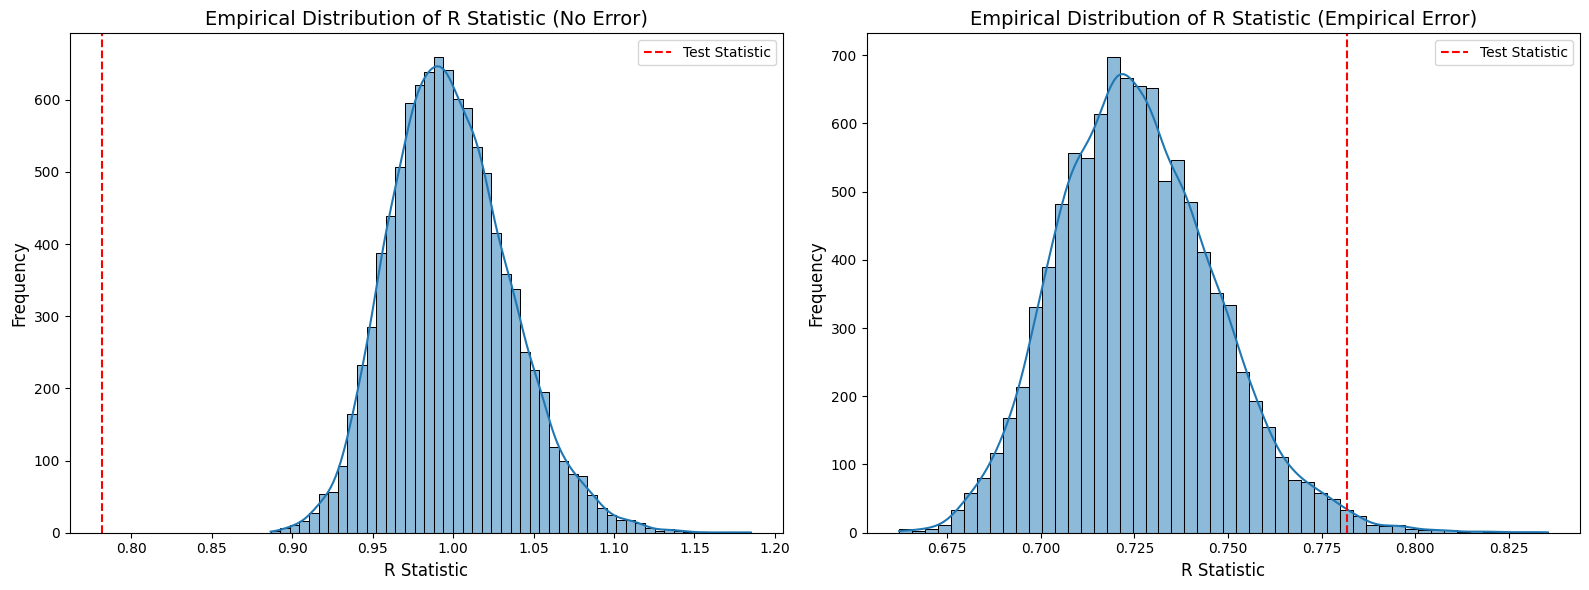

In [26]:
# Making one demonstrative test for the U.S. in 2021
test_stat_no_error, p_val_lo_no_error, p_val_hi_no_error, p_val_2_sided_no_error, dist_no_error = R_stat_pareto_test(
    us_21['log_net_worth'],
    order=2,
    n_samples_empirical_distribution=10000,
    round_decimals_non_log=None,
    measurement_error='None'
)
print('Test Statistic:', test_stat_no_error)
print('P-value (lower-sided):', p_val_lo_no_error)
print('P-value (upper-sided):', p_val_hi_no_error)
print('P-value (two-sided):', p_val_2_sided_no_error)

test_stat_error, p_val_lo_error, p_val_hi_error, p_val_2_sided_error, dist_error = R_stat_pareto_test(
    us_21['log_net_worth'],
    order=2,
    n_samples_empirical_distribution=10000,
    round_decimals_non_log=None,
    measurement_error='empirical_relative_trimmed'
)
print('Test Statistic:', test_stat_error)
print('P-value (lower-sided):', p_val_lo_error)
print('P-value (upper-sided):', p_val_hi_error)
print('P-value (two-sided):', p_val_2_sided_error)

# Plot both empirical distributions in separate plots
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
sns.histplot(dist_no_error, kde=True, ax=ax[0], bins=50)
ax[0].axvline(test_stat_no_error, color='red', linestyle='--', label='Test Statistic')
ax[0].legend()
ax[0].set_title('Empirical Distribution of R Statistic (No Error)', fontsize=14)
ax[0].set_xlabel('R Statistic', fontsize=12)
ax[0].set_ylabel('Frequency', fontsize=12)

sns.histplot(dist_error, kde=True, ax=ax[1], bins=50)
ax[1].axvline(test_stat_error, color='red', linestyle='--', label='Test Statistic')
ax[1].legend()
ax[1].set_title('Empirical Distribution of R Statistic (Empirical Error)', fontsize=14)
ax[1].set_xlabel('R Statistic', fontsize=12)
ax[1].set_ylabel('Frequency', fontsize=12)
plt.tight_layout()
plt.show()

In [27]:
# show the U.S. in 2021
grouped.get_group(('Southeast Asia', '2019'))

,year,rank,net_worth,full_name,self_made,country_of_citizenship,region,sub_region,log_net_worth
19495,2019-01-01,75.0,15.2,Dhanin Chearavanont,False,Thailand,East Asia,Southeast Asia,2.721295
19507,2019-01-01,87.0,14.5,Charoen Sirivadhanabhakdi,True,Thailand,East Asia,Southeast Asia,2.674149
19524,2019-01-01,104.0,12.8,Robert Kuok,True,Malaysia,East Asia,Southeast Asia,2.549445
19532,2019-01-01,112.0,12.0,Robert & Philip Ng,False,Singapore,East Asia,Southeast Asia,2.484907
19571,2019-01-01,149.0,9.4,Quek Leng Chan,False,Malaysia,East Asia,Southeast Asia,2.240710
...,...,...,...,...,...,...,...,...,...
21297,2019-01-01,1818.0,1.2,Lim Wee Chai,True,Malaysia,East Asia,Southeast Asia,0.182322
21367,2019-01-01,1941.0,1.1,Anant Asavabhokin,True,Thailand,East Asia,Southeast Asia,0.095310
21458,2019-01-01,1941.0,1.1,Rit Thirakomen,False,Thailand,East Asia,Southeast Asia,0.095310
21517,2019-01-01,2057.0,1.0,Chatchai Kaewbootta,True,Thailand,East Asia,Southeast Asia,0.000000


In [28]:
# Do statistical tests for all sub_region / year combinations with more than 64 observations
all_sub_regions = df['sub_region'].unique()
all_sub_regions = all_sub_regions[all_sub_regions != 'Not a sub-region']
all_years = df['year'].unique()

In [29]:
test_results = {}
for sub_region in all_sub_regions:
    for year in all_years:
        print(f'Running test for {sub_region} in {year}')
        data = df[(df['sub_region'] == sub_region) & (df['year'] == year)]
        if len(data) < 64:
            continue
        
        # No rounding, no measurement error
        R_2_stat_nr_nm, R_2_p_val_lo_nr_nm, R_2_p_val_hi_nr_nm, R_2_p_val_2_sided_nr_nm, dist = R_stat_pareto_test(
            data['log_net_worth'],
            order=2,
            n_samples_empirical_distribution=10000,
            round_decimals_non_log=None,
            measurement_error='None'
        )
        R_3_stat_nr_nm, R_3_p_val_lo_nr_nm, R_3_p_val_hi_nr_nm, R_3_p_val_2_sided_nr_nm, dist = R_stat_pareto_test(
            data['log_net_worth'],
            order=3,
            n_samples_empirical_distribution=10000,
            round_decimals_non_log=None,
            measurement_error='None'
        )

        # Rounding, no measurement error
        R_2_stat_r_nm, R_2_p_val_lo_r_nm, R_2_p_val_hi_r_nm, R_2_p_val_2_sided_r_nm, dist = R_stat_pareto_test(
            data['log_net_worth'],
            order=2,
            n_samples_empirical_distribution=10000,
            round_decimals_non_log=1,
            measurement_error='None'
        )
        R_3_stat_r_nm, R_3_p_val_lo_r_nm, R_3_p_val_hi_r_nm, R_3_p_val_2_sided_r_nm, dist = R_stat_pareto_test(
            data['log_net_worth'],
            order=3,
            n_samples_empirical_distribution=10000,
            round_decimals_non_log=1,
            measurement_error='None'
        )

        # Rounding, measurement error (full density)
        R_2_stat_r_m_fd, R_2_p_val_lo_r_m_fd, R_2_p_val_hi_r_m_fd, R_2_p_val_2_sided_r_m_fd, dist = R_stat_pareto_test(
            data['log_net_worth'],
            order=2,
            n_samples_empirical_distribution=10000,
            round_decimals_non_log=1,
            measurement_error='empirical_relative'
        )
        R_3_stat_r_m_fd, R_3_p_val_lo_r_m_fd, R_3_p_val_hi_r_m_fd, R_3_p_val_2_sided_r_m_fd, dist = R_stat_pareto_test(
            data['log_net_worth'],
            order=3,
            n_samples_empirical_distribution=10000,
            round_decimals_non_log=1,
            measurement_error='empirical_relative'
        )

        # Rounding, measurement error (trimmed density)
        R_2_stat_r_m_td, R_2_p_val_lo_r_m_td, R_2_p_val_hi_r_m_td, R_2_p_val_2_sided_r_m_td, dist = R_stat_pareto_test(
            data['log_net_worth'],
            order=2,
            n_samples_empirical_distribution=10000,
            round_decimals_non_log=1,
            measurement_error='empirical_relative_trimmed'
        )
        R_3_stat_r_m_td, R_3_p_val_lo_r_m_td, R_3_p_val_hi_r_m_td, R_3_p_val_2_sided_r_m_td, dist = R_stat_pareto_test(
            data['log_net_worth'],
            order=3,
            n_samples_empirical_distribution=10000,
            round_decimals_non_log=1,
            measurement_error='empirical_relative_trimmed'
        )

        # Rounding, measurement error (normalised)
        R_2_stat_r_m_nd, R_2_p_val_lo_r_m_nd, R_2_p_val_hi_r_m_nd, R_2_p_val_2_sided_r_m_nd, dist = R_stat_pareto_test(
            data['log_net_worth'],
            order=2,
            n_samples_empirical_distribution=10000,
            round_decimals_non_log=1,
            measurement_error='empirical_relative_normalised'
        )
        R_3_stat_r_m_nd, R_3_p_val_lo_r_m_nd, R_3_p_val_hi_r_m_nd, R_3_p_val_2_sided_r_m_nd, dist = R_stat_pareto_test(
            data['log_net_worth'],
            order=3,
            n_samples_empirical_distribution=10000,
            round_decimals_non_log=1,
            measurement_error='empirical_relative_normalised'
        )

        test_results[(sub_region, year)] = {
            'R_2_stat_nr_nm': R_2_stat_nr_nm,
            'R_2_p_val_lo_nr_nm': R_2_p_val_lo_nr_nm,
            'R_2_p_val_hi_nr_nm': R_2_p_val_hi_nr_nm,
            'R_2_p_val_2_sided_nr_nm': R_2_p_val_2_sided_nr_nm,
            'R_3_stat_nr_nm': R_3_stat_nr_nm,
            'R_3_p_val_lo_nr_nm': R_3_p_val_lo_nr_nm,
            'R_3_p_val_hi_nr_nm': R_3_p_val_hi_nr_nm,
            'R_3_p_val_2_sided_nr_nm': R_3_p_val_2_sided_nr_nm,
            'R_2_stat_r_nm': R_2_stat_r_nm,
            'R_2_p_val_lo_r_nm': R_2_p_val_lo_r_nm,
            'R_2_p_val_hi_r_nm': R_2_p_val_hi_r_nm,
            'R_2_p_val_2_sided_r_nm': R_2_p_val_2_sided_r_nm,
            'R_3_stat_r_nm': R_3_stat_r_nm,
            'R_3_p_val_lo_r_nm': R_3_p_val_lo_r_nm,
            'R_3_p_val_hi_r_nm': R_3_p_val_hi_r_nm,
            'R_3_p_val_2_sided_r_nm': R_3_p_val_2_sided_r_nm,
            'R_2_stat_r_m_fd': R_2_stat_r_m_fd,
            'R_2_p_val_lo_r_m_fd': R_2_p_val_lo_r_m_fd,
            'R_2_p_val_hi_r_m_fd': R_2_p_val_hi_r_m_fd,
            'R_2_p_val_2_sided_r_m_fd': R_2_p_val_2_sided_r_m_fd,
            'R_3_stat_r_m_fd': R_3_stat_r_m_fd,
            'R_3_p_val_lo_r_m_fd': R_3_p_val_lo_r_m_fd,
            'R_3_p_val_hi_r_m_fd': R_3_p_val_hi_r_m_fd,
            'R_3_p_val_2_sided_r_m_fd': R_3_p_val_2_sided_r_m_fd,
            'R_2_stat_r_m_td': R_2_stat_r_m_td,
            'R_2_p_val_lo_r_m_td': R_2_p_val_lo_r_m_td,
            'R_2_p_val_hi_r_m_td': R_2_p_val_hi_r_m_td,
            'R_2_p_val_2_sided_r_m_td': R_2_p_val_2_sided_r_m_td,
            'R_3_stat_r_m_td': R_3_stat_r_m_td,
            'R_3_p_val_lo_r_m_td': R_3_p_val_lo_r_m_td,
            'R_3_p_val_hi_r_m_td': R_3_p_val_hi_r_m_td,
            'R_3_p_val_2_sided_r_m_td': R_3_p_val_2_sided_r_m_td,
            'R_2_stat_r_m_nd': R_2_stat_r_m_nd,
            'R_2_p_val_lo_r_m_nd': R_2_p_val_lo_r_m_nd,
            'R_2_p_val_hi_r_m_nd': R_2_p_val_hi_r_m_nd,
            'R_2_p_val_2_sided_r_m_nd': R_2_p_val_2_sided_r_m_nd,
            'R_3_stat_r_m_nd': R_3_stat_r_m_nd,
            'R_3_p_val_lo_r_m_nd': R_3_p_val_lo_r_m_nd,
            'R_3_p_val_hi_r_m_nd': R_3_p_val_hi_r_m_nd,
            'R_3_p_val_2_sided_r_m_nd': R_3_p_val_2_sided_r_m_nd
        }
test_results_df = pd.DataFrame(test_results).T

Running test for Southeast Asia in 1997-01-01 00:00:00
Running test for Southeast Asia in 1998-01-01 00:00:00
Running test for Southeast Asia in 1999-01-01 00:00:00
Running test for Southeast Asia in 2000-01-01 00:00:00
Running test for Southeast Asia in 2001-01-01 00:00:00
Running test for Southeast Asia in 2002-01-01 00:00:00
Running test for Southeast Asia in 2003-01-01 00:00:00
Running test for Southeast Asia in 2004-01-01 00:00:00
Running test for Southeast Asia in 2005-01-01 00:00:00
Running test for Southeast Asia in 2006-01-01 00:00:00
Running test for Southeast Asia in 2007-01-01 00:00:00
Running test for Southeast Asia in 2008-01-01 00:00:00
Running test for Southeast Asia in 2009-01-01 00:00:00
Running test for Southeast Asia in 2010-01-01 00:00:00
Running test for Southeast Asia in 2011-01-01 00:00:00
Running test for Southeast Asia in 2012-01-01 00:00:00
Running test for Southeast Asia in 2013-01-01 00:00:00
Running test for Southeast Asia in 2014-01-01 00:00:00
Running te

In [30]:
test_results_df

R_2_stat_nr_nm  R_2_p_val_lo_nr_nm  \
Southeast Asia 2018-01-01        0.821118              0.0422   
               2019-01-01        0.780565              0.0079   
               2021-01-01        0.786879              0.0069   
               2022-01-01        0.781178              0.0057   
               2023-01-01        0.842757              0.0514   
...                                   ...                 ...   
Russia         2019-01-01        0.911908              0.2100   
               2020-01-01        0.933449              0.3046   
               2021-01-01        0.850887              0.0292   
               2022-01-01        0.901725              0.2152   
               2023-01-01        0.860160              0.0497   

                           R_2_p_val_hi_nr_nm  R_2_p_val_2_sided_nr_nm  \
Southeast Asia 2018-01-01              0.9578                   0.0844   
               2019-01-01              0.9921                   0.0158   
               2021-01-01              0.9931                   0.0138   
               2022-01-01              0.9943                   0.0114   
               2023-01-01              0.9486                   0.1028   
...                                       ...                      ...   
Russia         2019-01-01              0.7900                   0.4200   
               2020-01-01              0.6954                   0.6092   
               2021-01-01              0.9708                   0.0584   
               2022-01-01              0.7848                   0.4304   
               2023-01-01              0.9503                   0.0994   

                           R_3_stat_nr_nm  R_3_p_val_lo_nr_nm  \
Southeast Asia 2018-01-01        0.564835              0.0285   
               2019-01-01        0.503336              0.0067   
               2021-01-01        0.514257              0.0051   
               2022-01-01        0.509237              0.0056   
               2023-01-01        0.614031              0.0474   
...                                   ...                 ...   
Russia         2019-01-01        0.694556              0.1063   
               2020-01-01        0.721262              0.1492   
               2021-01-01        0.602389              0.0130   
               2022-01-01        0.681248              0.1272   
               2023-01-01        0.620709              0.0294   

                           R_3_p_val_hi_nr_nm  R_3_p_val_2_sided_nr_nm  \
Southeast Asia 2018-01-01              0.9715                   0.0570   
               2019-01-01              0.9933                   0.0134   
               2021-01-01              0.9949                   0.0102   
               2022-01-01              0.9944                   0.0112   
               2023-01-01              0.9526                   0.0948   
...                                       ...                      ...   
Russia         2019-01-01              0.8937                   0.2126   
               2020-01-01              0.8508                   0.2984   
               2021-01-01              0.9870                   0.0260   
               2022-01-01              0.8728                   0.2544   
               2023-01-01              0.9706                   0.0588   

                           R_2_stat_r_nm  R_2_p_val_lo_r_nm  ...  \
Southeast Asia 2018-01-01       0.821118             0.0364  ...   
               2019-01-01       0.780565             0.0080  ...   
               2021-01-01       0.786879             0.0069  ...   
               2022-01-01       0.781178             0.0047  ...   
               2023-01-01       0.842757             0.0493  ...   
...                                  ...                ...  ...   
Russia         2019-01-01       0.911908             0.2000  ...   
               2020-01-01       0.933449             0.3085  ...   
               2021-01-01       0.850887             0.0303  ...   
       

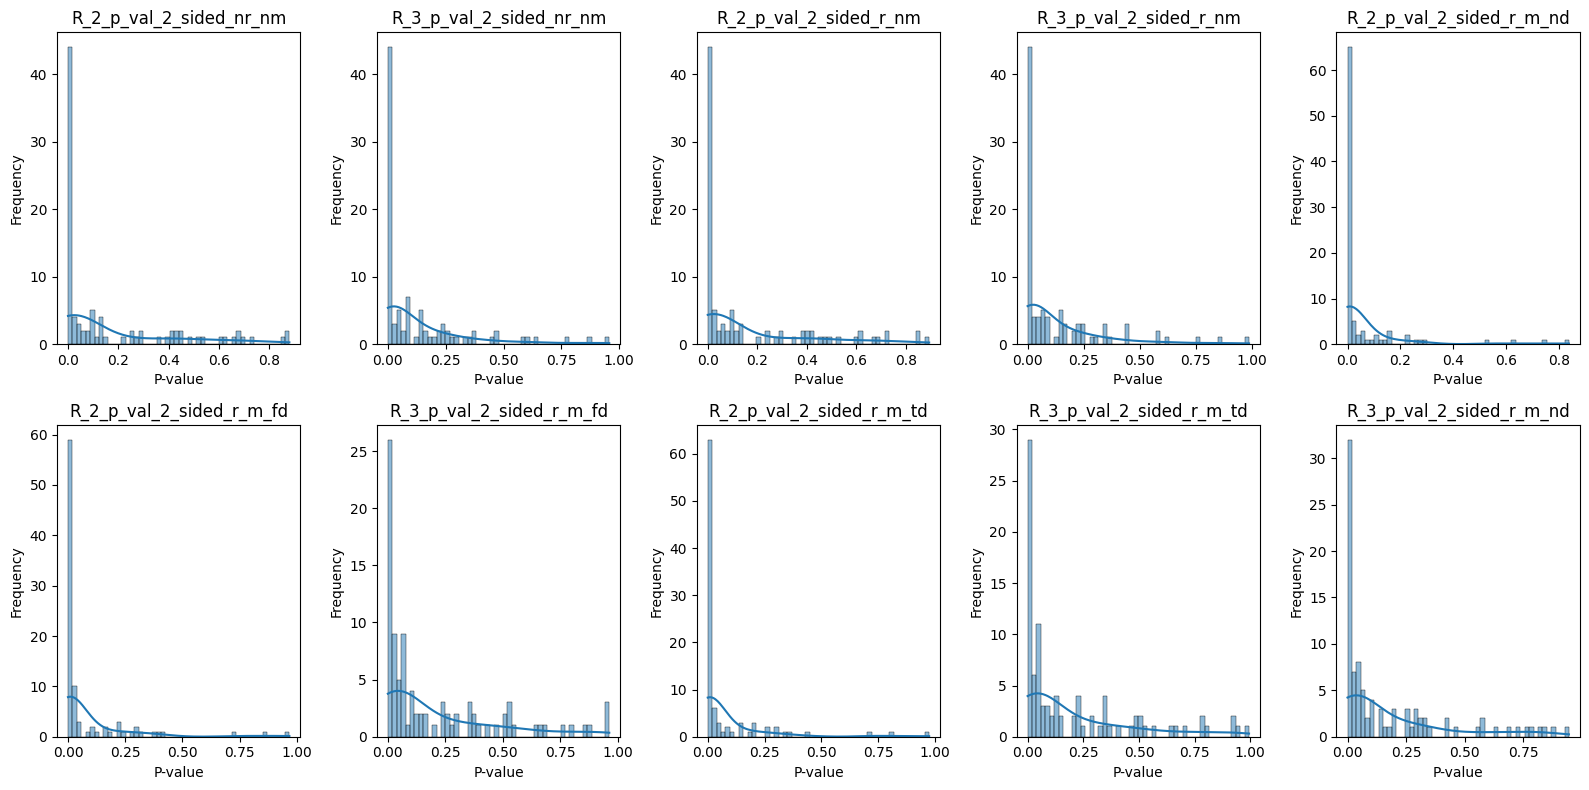

In [31]:
# Make a histogram grid of all 2 sided p_values
# the columns are R_2_p_val_2_sided_nr_nm, R_3_p_val_2_sided_nr_nm, R_2_p_val_2_sided_r_nm, R_3_p_val_2_sided_r_nm, R_2_p_val_2_sided_r_m_fd, R_3_p_val_2_sided_r_m_fd, R_2_p_val_2_sided_r_m_td, R_3_p_val_2_sided_r_m_td
n_bins = 50
fig, ax = plt.subplots(2, 5, figsize=(16, 8))
sns.histplot(test_results_df['R_2_p_val_2_sided_nr_nm'], kde=True, ax=ax[0, 0], bins=n_bins)
ax[0, 0].set_title('R_2_p_val_2_sided_nr_nm')
ax[0, 0].set_xlabel('P-value')
ax[0, 0].set_ylabel('Frequency')
sns.histplot(test_results_df['R_3_p_val_2_sided_nr_nm'], kde=True, ax=ax[0, 1], bins=n_bins)
ax[0, 1].set_title('R_3_p_val_2_sided_nr_nm')
ax[0, 1].set_xlabel('P-value')
ax[0, 1].set_ylabel('Frequency')
sns.histplot(test_results_df['R_2_p_val_2_sided_r_nm'], kde=True, ax=ax[0, 2], bins=n_bins)
ax[0, 2].set_title('R_2_p_val_2_sided_r_nm')
ax[0, 2].set_xlabel('P-value')
ax[0, 2].set_ylabel('Frequency')
sns.histplot(test_results_df['R_3_p_val_2_sided_r_nm'], kde=True, ax=ax[0, 3], bins=n_bins)
ax[0, 3].set_title('R_3_p_val_2_sided_r_nm')
ax[0, 3].set_xlabel('P-value')
ax[0, 3].set_ylabel('Frequency')
sns.histplot(test_results_df['R_2_p_val_2_sided_r_m_nd'], kde=True, ax=ax[0, 4], bins=n_bins)
ax[0, 4].set_title('R_2_p_val_2_sided_r_m_nd')
ax[0, 4].set_xlabel('P-value')
ax[0, 4].set_ylabel('Frequency')
sns.histplot(test_results_df['R_2_p_val_2_sided_r_m_fd'], kde=True, ax=ax[1, 0], bins=n_bins)
ax[1, 0].set_title('R_2_p_val_2_sided_r_m_fd')
ax[1, 0].set_xlabel('P-value')
ax[1, 0].set_ylabel('Frequency')
sns.histplot(test_results_df['R_3_p_val_2_sided_r_m_fd'], kde=True, ax=ax[1, 1], bins=n_bins)
ax[1, 1].set_title('R_3_p_val_2_sided_r_m_fd')
ax[1, 1].set_xlabel('P-value')
ax[1, 1].set_ylabel('Frequency')
sns.histplot(test_results_df['R_2_p_val_2_sided_r_m_td'], kde=True, ax=ax[1, 2], bins=n_bins)
ax[1, 2].set_title('R_2_p_val_2_sided_r_m_td')
ax[1, 2].set_xlabel('P-value')
ax[1, 2].set_ylabel('Frequency')
sns.histplot(test_results_df['R_3_p_val_2_sided_r_m_td'], kde=True, ax=ax[1, 3], bins=n_bins)
ax[1, 3].set_title('R_3_p_val_2_sided_r_m_td')
ax[1, 3].set_xlabel('P-value')
ax[1, 3].set_ylabel('Frequency')
sns.histplot(test_results_df['R_3_p_val_2_sided_r_m_nd'], kde=True, ax=ax[1, 4], bins=n_bins)
ax[1, 4].set_title('R_3_p_val_2_sided_r_m_nd')
ax[1, 4].set_xlabel('P-value')
ax[1, 4].set_ylabel('Frequency')
plt.tight_layout()
plt.show()


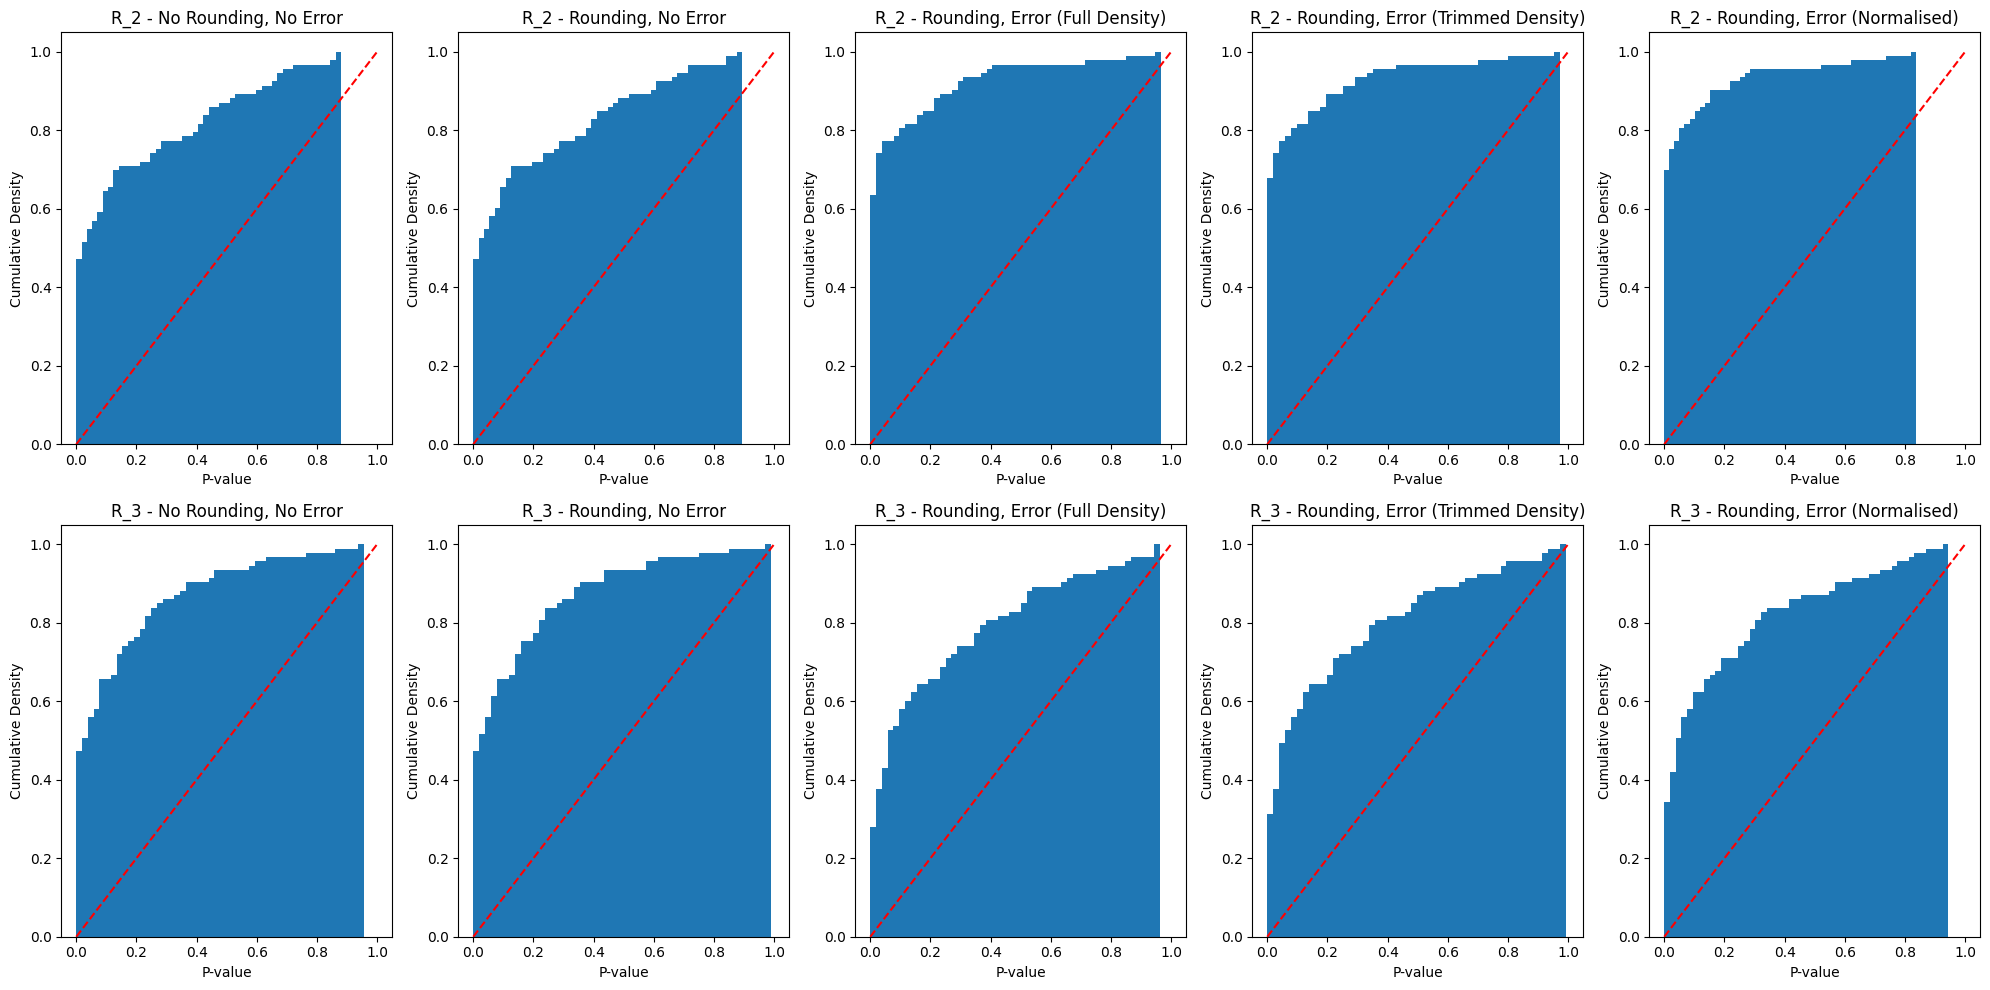

In [32]:
# Make cumulative density plots of all 2 sided p_values
fig, ax = plt.subplots(2, 5, figsize=(20, 10))
n_bins = 50
x = np.linspace(0, 1, 100)
# put the R_2 p-values in the first row, and the R_3 p-values in the second row
ax[0, 0].hist(test_results_df['R_2_p_val_2_sided_nr_nm'], bins=n_bins, density=True, cumulative=True)
ax[0, 0].plot(x, x, color='red', linestyle='--')
ax[0, 0].set_title('R_2 - No Rounding, No Error')
ax[0, 0].set_xlabel('P-value')
ax[0, 0].set_ylabel('Cumulative Density')
ax[0, 1].hist(test_results_df['R_2_p_val_2_sided_r_nm'], bins=n_bins, density=True, cumulative=True)
ax[0, 1].plot(x, x, color='red', linestyle='--')
ax[0, 1].set_title('R_2 - Rounding, No Error')
ax[0, 1].set_xlabel('P-value')
ax[0, 1].set_ylabel('Cumulative Density')
ax[0, 2].hist(test_results_df['R_2_p_val_2_sided_r_m_fd'], bins=n_bins, density=True, cumulative=True)
ax[0, 2].plot(x, x, color='red', linestyle='--')
ax[0, 2].set_title('R_2 - Rounding, Error (Full Density)')
ax[0, 2].set_xlabel('P-value')
ax[0, 2].set_ylabel('Cumulative Density')
ax[0, 3].hist(test_results_df['R_2_p_val_2_sided_r_m_td'], bins=n_bins, density=True, cumulative=True)
ax[0, 3].plot(x, x, color='red', linestyle='--')
ax[0, 3].set_title('R_2 - Rounding, Error (Trimmed Density)')
ax[0, 3].set_xlabel('P-value')
ax[0, 3].set_ylabel('Cumulative Density')
ax[0, 4].hist(test_results_df['R_2_p_val_2_sided_r_m_nd'], bins=n_bins, density=True, cumulative=True)
ax[0, 4].plot(x, x, color='red', linestyle='--')
ax[0, 4].set_title('R_2 - Rounding, Error (Normalised)')
ax[0, 4].set_xlabel('P-value')
ax[0, 4].set_ylabel('Cumulative Density')
ax[1, 0].hist(test_results_df['R_3_p_val_2_sided_nr_nm'], bins=n_bins, density=True, cumulative=True)
ax[1, 0].plot(x, x, color='red', linestyle='--')
ax[1, 0].set_title('R_3 - No Rounding, No Error')
ax[1, 0].set_xlabel('P-value')
ax[1, 0].set_ylabel('Cumulative Density')
ax[1, 1].hist(test_results_df['R_3_p_val_2_sided_r_nm'], bins=n_bins, density=True, cumulative=True)
ax[1, 1].plot(x, x, color='red', linestyle='--')
ax[1, 1].set_title('R_3 - Rounding, No Error')
ax[1, 1].set_xlabel('P-value')
ax[1, 1].set_ylabel('Cumulative Density')
ax[1, 2].hist(test_results_df['R_3_p_val_2_sided_r_m_fd'], bins=n_bins, density=True, cumulative=True)
ax[1, 2].plot(x, x, color='red', linestyle='--')
ax[1, 2].set_title('R_3 - Rounding, Error (Full Density)')
ax[1, 2].set_xlabel('P-value')
ax[1, 2].set_ylabel('Cumulative Density')
ax[1, 3].hist(test_results_df['R_3_p_val_2_sided_r_m_td'], bins=n_bins, density=True, cumulative=True)
ax[1, 3].plot(x, x, color='red', linestyle='--')
ax[1, 3].set_title('R_3 - Rounding, Error (Trimmed Density)')
ax[1, 3].set_xlabel('P-value')
ax[1, 3].set_ylabel('Cumulative Density')
ax[1, 4].hist(test_results_df['R_3_p_val_2_sided_r_m_nd'], bins=n_bins, density=True, cumulative=True)
ax[1, 4].plot(x, x, color='red', linestyle='--')
ax[1, 4].set_title('R_3 - Rounding, Error (Normalised)')
ax[1, 4].set_xlabel('P-value')
ax[1, 4].set_ylabel('Cumulative Density')
plt.tight_layout()
plt.show()

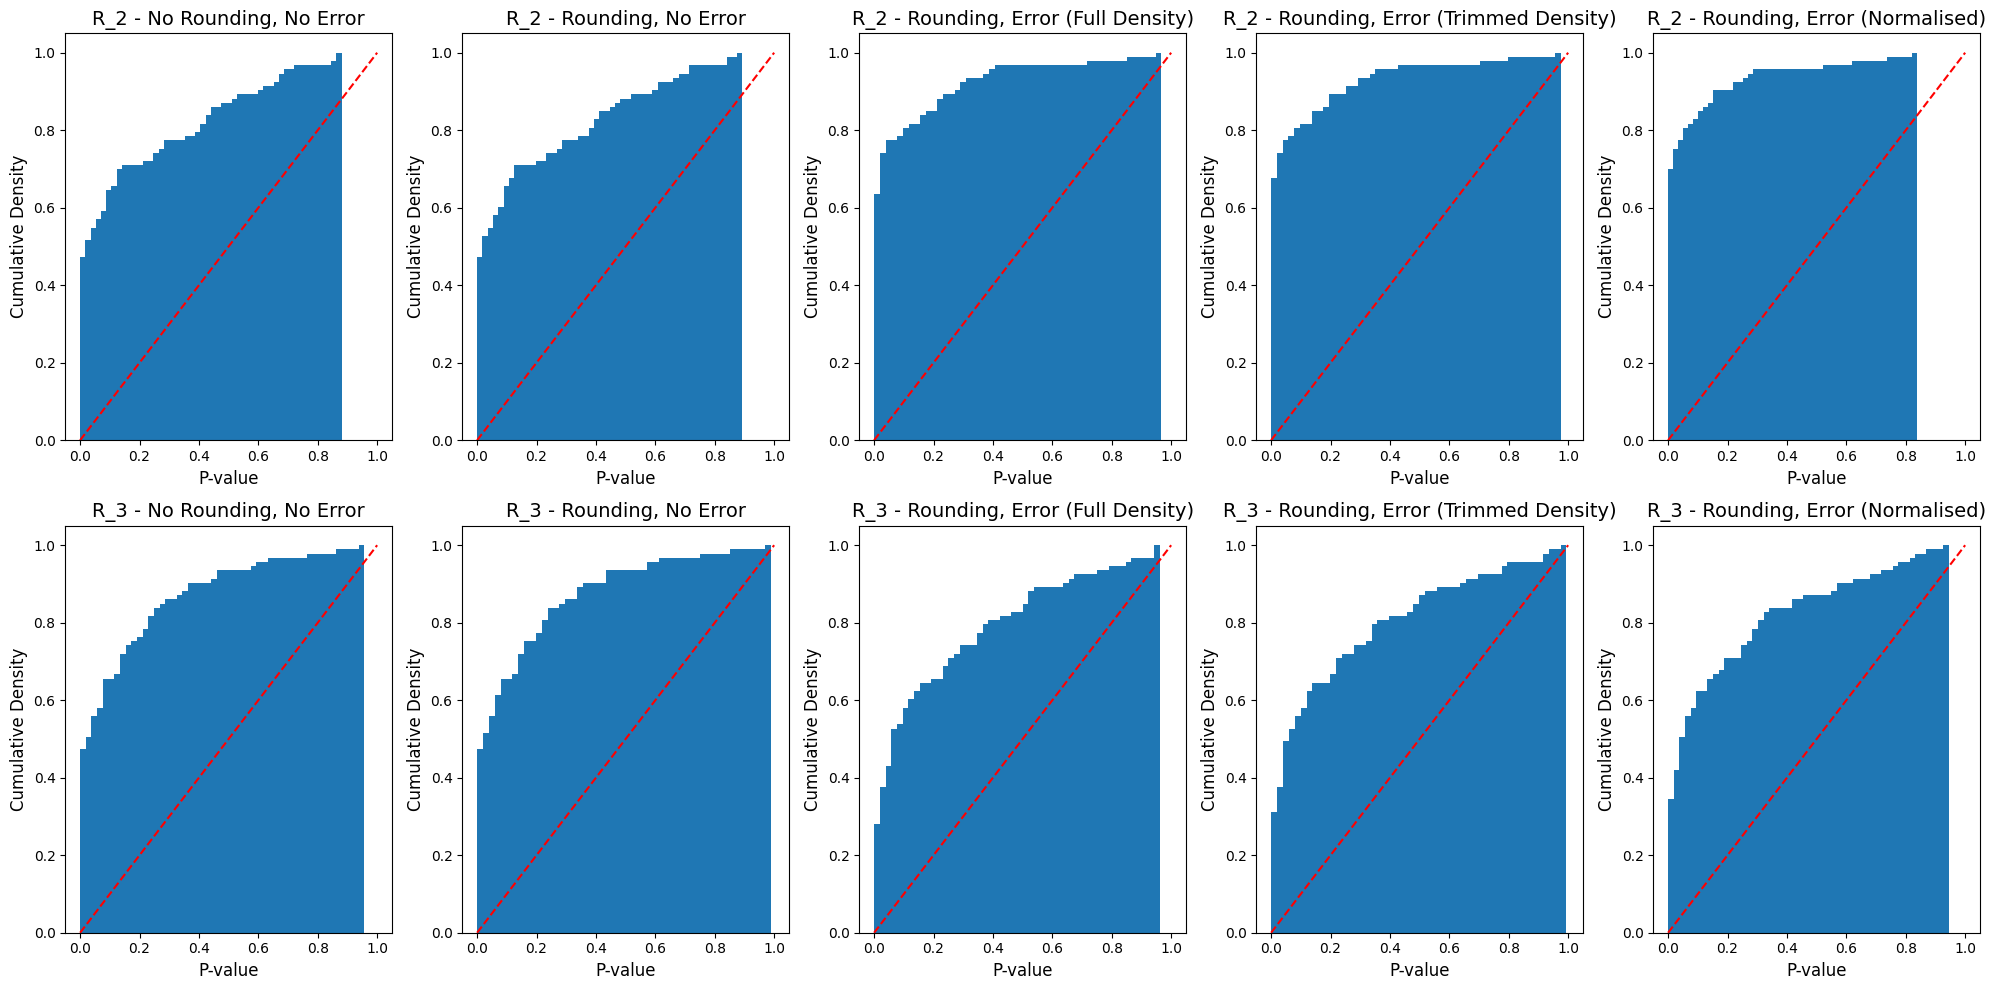

In [40]:
# Make cumulative density plots of all 2 sided p_values
fig, ax = plt.subplots(2, 5, figsize=(20, 10))
n_bins = 50
x = np.linspace(0, 1, 100)

# Titles and labels
titles = [
    'R_2 - No Rounding, No Error',
    'R_2 - Rounding, No Error',
    'R_2 - Rounding, Error (Full Density)',
    'R_2 - Rounding, Error (Trimmed Density)',
    'R_2 - Rounding, Error (Normalised)',
    'R_3 - No Rounding, No Error',
    'R_3 - Rounding, No Error',
    'R_3 - Rounding, Error (Full Density)',
    'R_3 - Rounding, Error (Trimmed Density)',
    'R_3 - Rounding, Error (Normalised)'
]

keys = [
    'R_2_p_val_2_sided_nr_nm',
    'R_2_p_val_2_sided_r_nm',
    'R_2_p_val_2_sided_r_m_fd',
    'R_2_p_val_2_sided_r_m_td',
    'R_2_p_val_2_sided_r_m_nd',
    'R_3_p_val_2_sided_nr_nm',
    'R_3_p_val_2_sided_r_nm',
    'R_3_p_val_2_sided_r_m_fd',
    'R_3_p_val_2_sided_r_m_td',
    'R_3_p_val_2_sided_r_m_nd'
]

for i in range(2):
    for j in range(5):
        idx = i * 5 + j
        key = keys[idx]
        ax[i, j].hist(test_results_df[key], bins=n_bins, density=True, cumulative=True)
        ax[i, j].plot(x, x, color='red', linestyle='--')
        ax[i, j].set_title(titles[idx], fontsize=14)
        ax[i, j].set_xlabel('P-value', fontsize=12)
        ax[i, j].set_ylabel('Cumulative Density', fontsize=12)

plt.tight_layout()
plt.show()

In [33]:
# lower sided p-value columns
lower_sided_columns = [col for col in test_results_df.columns if 'lo' in col]
# upper sided p-value columns
upper_sided_columns = [col for col in test_results_df.columns if 'hi' in col]

# for each column, calculate the share of significant results at different significance levels
significance_levels = [0.001, 0.01, 0.05, 0.10, 0.25]
significance_results = {}
for column in lower_sided_columns:
    significance_results[column] = {}
    for significance_level in significance_levels:
        significance_results[column][significance_level] = (test_results_df[column] < significance_level).mean()
significance_results_lo_df = pd.DataFrame(significance_results)

In [34]:
significance_results_lo_df

,R_2_p_val_lo_nr_nm,R_3_p_val_lo_nr_nm,R_2_p_val_lo_r_nm,R_3_p_val_lo_r_nm,R_2_p_val_lo_r_m_fd,R_3_p_val_lo_r_m_fd,R_2_p_val_lo_r_m_td,R_3_p_val_lo_r_m_td,R_2_p_val_lo_r_m_nd,R_3_p_val_lo_r_m_nd
0.001,0.311828,0.279570,0.322581,0.301075,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
0.010,0.473118,0.473118,0.483871,0.473118,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
0.050,0.634409,0.655914,0.634409,0.655914,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
0.100,0.709677,0.752688,0.709677,0.752688,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
0.250,0.870968,0.935484,0.881720,0.935484,0.010753,0.021505,0.010753,0.021505,0.0,0.010753


In [35]:
lower_sided_columns = [col for col in test_results_df.columns if '2_sided' in col]

# for each column, calculate the share of significant results at different significance levels
significance_levels = [0.001, 0.01, 0.05, 0.10, 0.25]
significance_results = {}
for column in lower_sided_columns:
    significance_results[column] = {}
    for significance_level in significance_levels:
        significance_results[column][significance_level] = (test_results_df[column] < significance_level).mean()
significance_results_two_sided_df = pd.DataFrame(significance_results)

In [36]:
significance_results_two_sided_df

,R_2_p_val_2_sided_nr_nm,R_3_p_val_2_sided_nr_nm,R_2_p_val_2_sided_r_nm,R_3_p_val_2_sided_r_nm,R_2_p_val_2_sided_r_m_fd,R_3_p_val_2_sided_r_m_fd,R_2_p_val_2_sided_r_m_td,R_3_p_val_2_sided_r_m_td,R_2_p_val_2_sided_r_m_nd,R_3_p_val_2_sided_r_m_nd
0.001,0.279570,0.268817,0.290323,0.268817,0.365591,0.172043,0.387097,0.150538,0.419355,0.182796
0.010,0.397849,0.408602,0.408602,0.387097,0.580645,0.268817,0.602151,0.268817,0.634409,0.268817
0.050,0.548387,0.526882,0.548387,0.526882,0.741935,0.387097,0.774194,0.408602,0.774194,0.494624
0.100,0.634409,0.655914,0.634409,0.655914,0.784946,0.548387,0.806452,0.559140,0.827957,0.591398
0.250,0.720430,0.817204,0.741935,0.806452,0.892473,0.688172,0.892473,0.720430,0.924731,0.720430


In [37]:
# All R_2 and R_3 statistics
all_R2_stats = test_results_df['R_2_stat_nr_nm']
all_R3_stats = test_results_df['R_3_stat_nr_nm']
# get some empirical distribution of the R_2 and R_3 statistics for a fixed sample size
# random pareto samples
sample_size = 100
data = np.random.pareto(2, size=(sample_size, 10000))
dist_R_2 = R_stat_pareto_test(
    data,
    order=2,
    n_samples_empirical_distribution=10000,
    round_decimals_non_log=1,
    measurement_error='empirical_relative_normalised_condensed'
)[4]
dist_R_3 = R_stat_pareto_test(
    data,
    order=3,
    n_samples_empirical_distribution=10000,
    round_decimals_non_log=1,
    measurement_error='empirical_relative_normalised_condensed'
)[4]

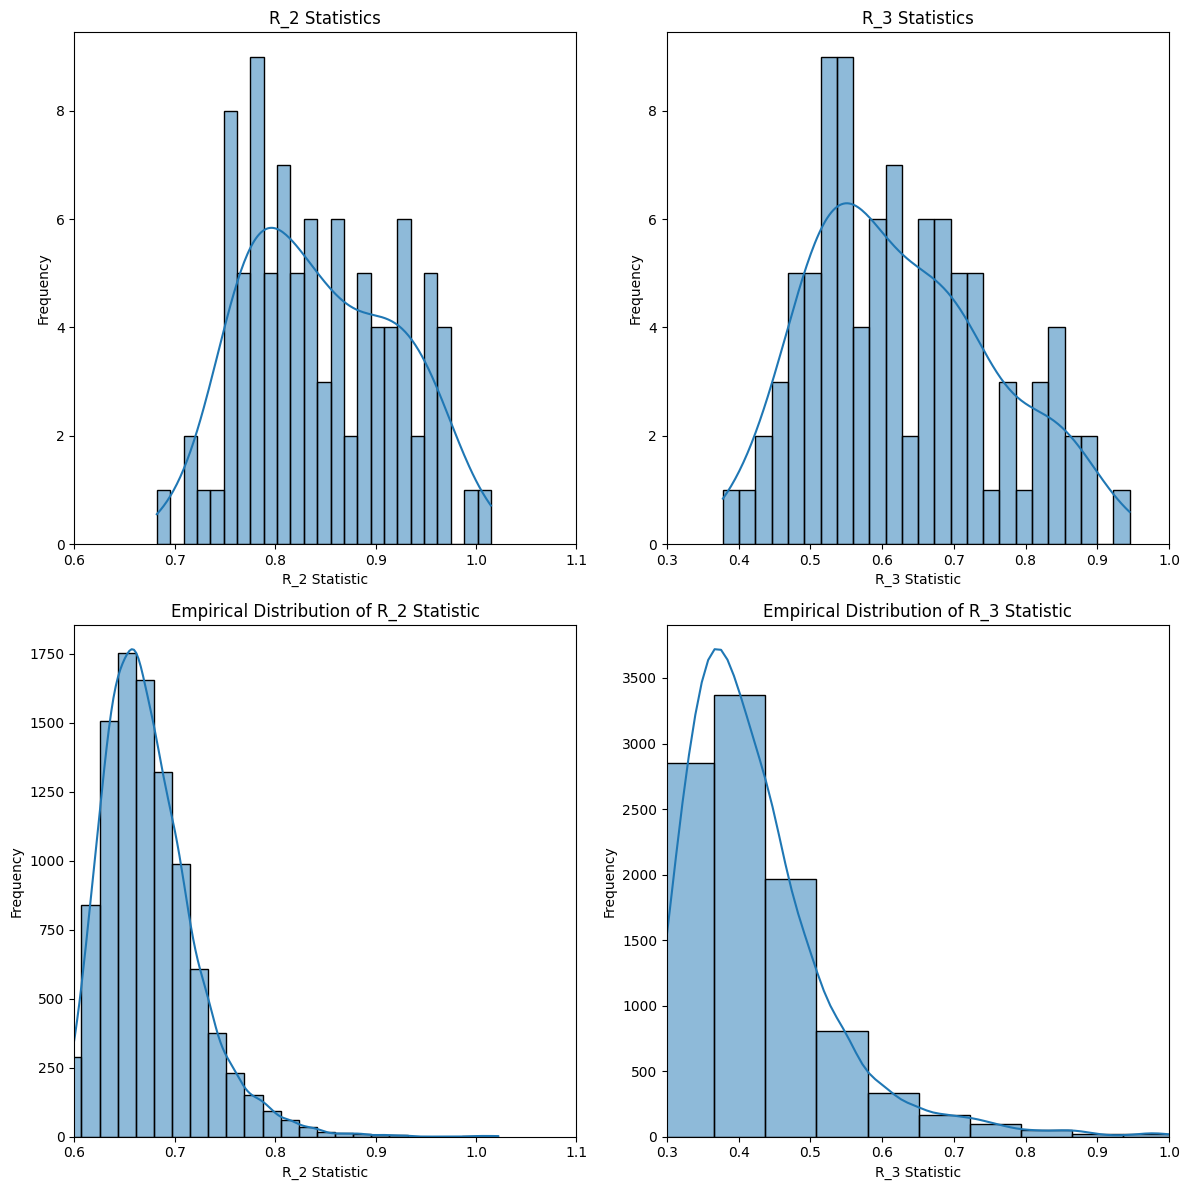

In [38]:
# In a 2x2 grid, plot the histograms of the R_2 and R_3 statistics and the empirical distributions
# Make sure the range of the x-axis is the same for all plots
fig, ax = plt.subplots(2, 2, figsize=(12, 12))
n_bins = 25
sns.histplot(all_R2_stats, kde=True, ax=ax[0, 0], bins=n_bins)
ax[0, 0].set_title('R_2 Statistics')
ax[0, 0].set_xlabel('R_2 Statistic')
ax[0, 0].set_ylabel('Frequency')
ax[0, 0].set_xlim([0.6, 1.1])
sns.histplot(all_R3_stats, kde=True, ax=ax[0, 1], bins=n_bins)
ax[0, 1].set_title('R_3 Statistics')
ax[0, 1].set_xlabel('R_3 Statistic')
ax[0, 1].set_ylabel('Frequency')
ax[0, 1].set_xlim([0.3, 1.0])
sns.histplot(dist_R_2, kde=True, ax=ax[1, 0], bins=n_bins)
ax[1, 0].set_title('Empirical Distribution of R_2 Statistic')
ax[1, 0].set_xlabel('R_2 Statistic')
ax[1, 0].set_ylabel('Frequency')
ax[1, 0].set_xlim([0.6, 1.1])
sns.histplot(dist_R_3, kde=True, ax=ax[1, 1], bins=n_bins)
ax[1, 1].set_title('Empirical Distribution of R_3 Statistic')
ax[1, 1].set_xlabel('R_3 Statistic')
ax[1, 1].set_ylabel('Frequency')
ax[1, 1].set_xlim([0.3, 1.0])
plt.tight_layout()
plt.show()


## Conclusions

In general, it seems like we can reject Paretianity, but not in the way Teulings and Toussaint (2024) do:
* It is expected that the R_stat is below 1 when we introduce measurement error
* No noticeable effect of rounding errors
* In general, the R_statistics seem *too high* for an H_0 of Paretianity